# NSL-KDD Classification

## Install Dependencies

In [118]:
!pip install numpy
!pip install pandas
!pip install scikit-learn

In [127]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

## Train Model

In [128]:
data_train = pd.read_csv('KDDTrain.CSV')
data_test = pd.read_csv('KDDTest.CSV')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

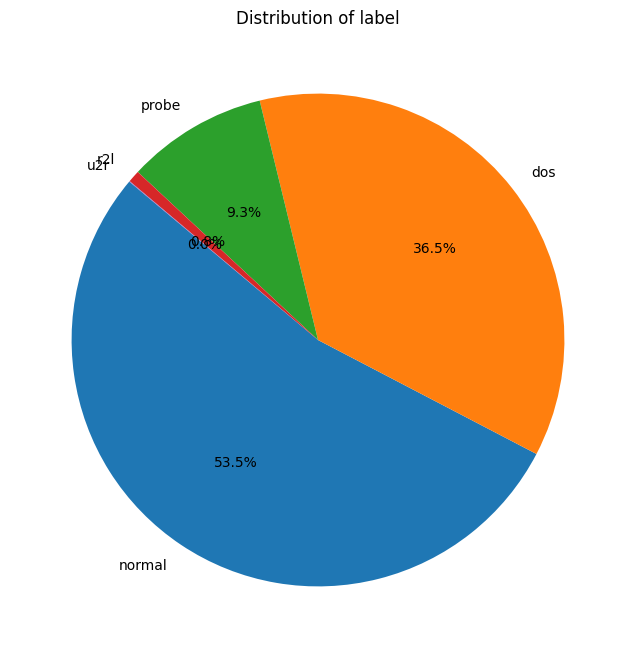

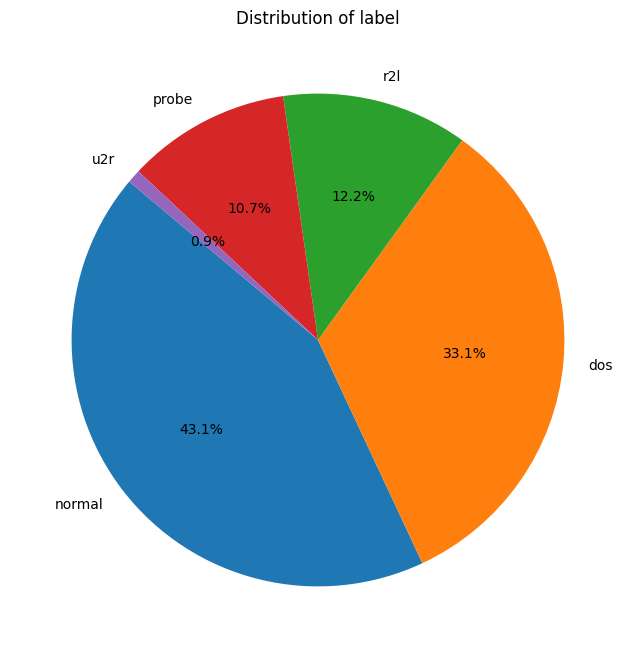

In [129]:
def plot_pie_chart(column_name, frame):
    # Check if the column exists in the dataframe
    if column_name not in frame.columns:
        print(f"Column '{column_name}' not found in the dataset.")
        return

    # Get the value counts of the column
    column_data = frame[column_name].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column_name}')
    plt.show()

plot_pie_chart('label', data_train)
plot_pie_chart('label', data_test)


In [130]:
outcome_mapping = {
    'normal': 0,
    'dos': 1,
    'probe': 2,
    'r2l': 3,
    'u2r': 4,
}


def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

cat_cols = ['protocol_type','service','flag','land', 'logged_in','is_host_login','is_guest_login', 'label']


def preprocess(dataframe):
    df = dataframe.copy()
    df_num = df.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    df.drop(labels=num_cols, axis="columns", inplace=True)
    df[num_cols] = scaled_df[num_cols]
   
    #df['label'] = df['label'].replace({"normal": 0})
    #df.loc[df['label'] != 0, "label"] = 1  # Everything else is mapped to 1
    df['label'] = df['label'].map(outcome_mapping)
   
    df = pd.get_dummies(df, columns = ['protocol_type', 'service', 'flag'],drop_first=True)
    return df

scaled_train = preprocess(data_train)
scaled_test = preprocess(data_test)
scaled_test = scaled_test.reindex(columns=scaled_train.columns, fill_value=0)
print(scaled_train['label'].unique())


[0 1 3 2 4]


In [131]:
x_train = scaled_train.drop(['label'] , axis = 1).values
y_train = scaled_train['label'].values
x_test = scaled_test.drop(['label'] , axis = 1).values
y_test = scaled_test['label'].values


In [135]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='weighted')  # Update average
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='weighted')  # Update average
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='weighted')  # Update average
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='weighted')  # Update average
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy * 100) + str(name) + " {}".format(test_accuracy * 100))
    print("Training Precision " + str(name) + " {}  Test Precision ".format(train_precision * 100) + str(name) + " {}".format(test_precision * 100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall * 100) + str(name) + " {}".format(test_recall * 100))

In [139]:
lr = LogisticRegression(max_iter=500).fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

/Users/tarunannapareddy/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tarunannapareddy/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarunannapareddy/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and

Training Accuracy Logistic Regression 91.09729862748367  Test Accuracy Logistic Regression 68.62136266855926
Training Precision Logistic Regression 90.55527515917514  Test Precision Logistic Regression 68.83358697049928
Training Recall Logistic Regression 91.09729862748367  Test Recall Logistic Regression 68.62136266855926


In [137]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

/Users/tarunannapareddy/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarunannapareddy/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy KNeighborsClassifier 99.03868289236583  Test Accuracy KNeighborsClassifier 75.35929737402412
Training Precision KNeighborsClassifier 98.99415052157339  Test Precision KNeighborsClassifier 75.85445872999435
Training Recall KNeighborsClassifier 99.03868289236583  Test Recall KNeighborsClassifier 75.35929737402412


In [140]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

/Users/tarunannapareddy/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/tarunannapareddy/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl) 97.06445031871908  Test Accuracy Linear SVC(LBasedImpl) 67.98261178140525
Training Precision Linear SVC(LBasedImpl) 97.66274527353663  Test Precision Linear SVC(LBasedImpl) 61.211875821673765
Training Recall Linear SVC(LBasedImpl) 97.06445031871908  Test Recall Linear SVC(LBasedImpl) 67.98261178140525
